<a href="https://colab.research.google.com/github/Ssahu620/SS-ML-AI-001/blob/main/ss_Assignment%205%20-%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [44]:
data = pd.read_csv('data/coupons.csv')

In [45]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3 .Decide what to do about your missing data -- drop, replace, other...

***ss - checking percent of missing values by columns.***

In [6]:
data["car"].isna().sum()/data.shape[0]

0.9914853358561968

***ss- Car is not going to make any differnece in analysis so drop car.***

In [7]:
if "car" in data.columns:
  data = data.drop("car", axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [8]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [9]:
data["Bar"].isna().sum()/data.shape[0]

0.008435824660990224

***ss - Missing values in "Bar" are less than a percent, value_count shows one value is dominant so updating all missing values to the most frequently used value.***

In [10]:
data["Bar"].value_counts()

,count
Bar,
never,5197
less1,3482
1~3,2473
4~8,1076
gt8,349


In [11]:
data["Bar"].fillna("never", inplace = True)

<ipython-input-11-44bad47d2177>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Bar"].fillna("never", inplace = True)


In [12]:
print(data["Bar"].isna().sum())

0


In [13]:
data["CoffeeHouse"].isna().sum()/data.shape[0]

0.017108167770419427

***ss - Missing values in "CoffeeHouse" are less than a percent, however value_count shows three values are almost similar number of reconds so updating missing values to"Missing Val" ***

In [14]:
data["CoffeeHouse"].value_counts()

,count
CoffeeHouse,
less1,3385
1~3,3225
never,2962
4~8,1784
gt8,1111


In [15]:
data["CoffeeHouse"].fillna("Missing Val", inplace = True)

<ipython-input-15-7e1b46a3c8b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["CoffeeHouse"].fillna("Missing Val", inplace = True)


In [16]:
print(data["CoffeeHouse"].isna().sum())

0


***ss - Missing values in CarryAway, RestaurantLessThan20 and  Restaurant20To50 are also less than 1% . However two most frequently used values are very close to each other in count so adding a new value "Missing Val" for missing Values.

In [17]:
data["CarryAway"].value_counts()

,count
CarryAway,
1~3,4672
4~8,4258
less1,1856
gt8,1594
never,153


In [18]:
data["CarryAway"].fillna("Missing Val", inplace = True)

<ipython-input-18-a1944598c715>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["CarryAway"].fillna("Missing Val", inplace = True)


In [19]:
print(data["CarryAway"].isna().sum())

0


In [20]:
data["RestaurantLessThan20"].value_counts()

,count
RestaurantLessThan20,
1~3,5376
4~8,3580
less1,2093
gt8,1285
never,220


**`ss - Missing values in "RestaurantLessThan20" are less than a percent, value_count shows one value is dominant so updating all missing values to the most frequently used value.`**

In [21]:
data["RestaurantLessThan20"].fillna("1~3", inplace = True)

<ipython-input-21-c54de7202b1a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["RestaurantLessThan20"].fillna("1~3", inplace = True)


In [22]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [23]:
data["Restaurant20To50"].value_counts()

,count
Restaurant20To50,
less1,6077
1~3,3290
never,2136
4~8,728
gt8,264


**`ss - Missing values in "RestaurantLessThan20" are less than a percent, value_count shows one value is dominant so updating all missing values to the most frequently used value.`**

In [24]:
data["Restaurant20To50"].fillna("less1", inplace = True)

<ipython-input-24-4dc21d5e6ed4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Restaurant20To50"].fillna("less1", inplace = True)


In [25]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [26]:
data_accepted = data.query("Y == 1")
data_accepted_count = data_accepted.shape[0]
accepted_proportion = data_accepted_count/data.shape[0]

print("Proportion of total observation who chose to accept is ", round(accepted_proportion*100, 2), "%")


Proportion of total observation who chose to accept is  56.84 %


5. Use a bar plot to visualize the `coupon` column.

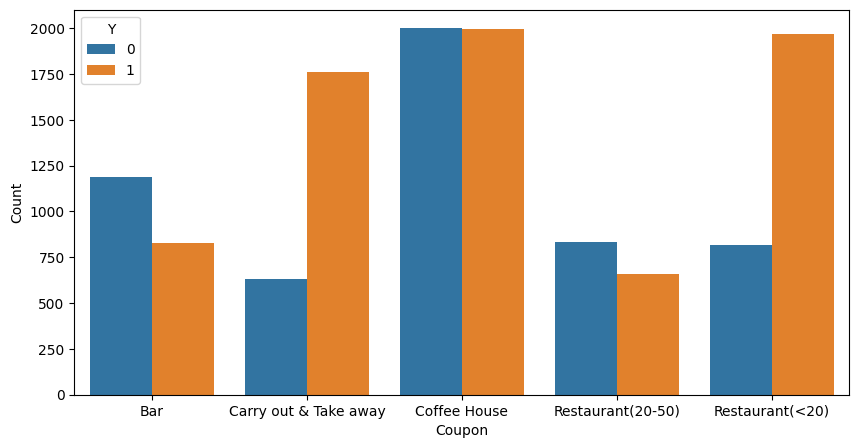

In [27]:
coupon_group = data.groupby(["coupon", "Y"]).count().reset_index()
coupon_group.head()
sns.barplot(data = coupon_group, x = "coupon", y="income", hue="Y")
plt.xlabel("Coupon")
plt.ylabel("Count")
plt.gcf().set_size_inches(10, 5)
plt.show()


6. Use a histogram to visualize the temperature column.

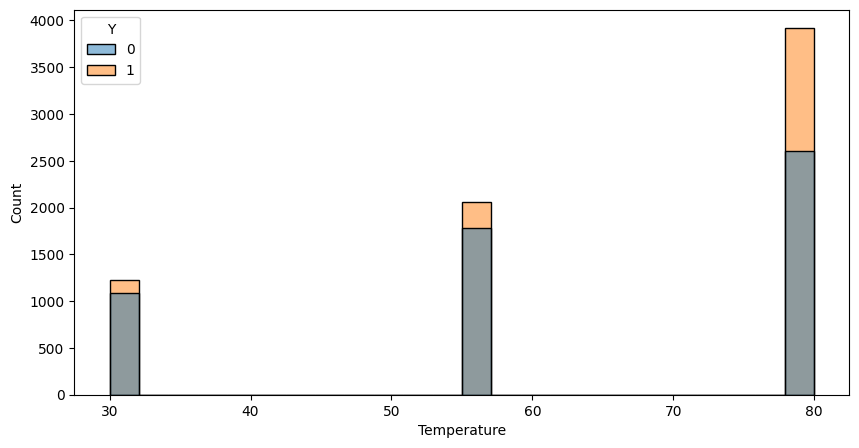

In [28]:
sns.histplot(data = data, x="temperature", hue="Y", multiple = "layer")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.gcf().set_size_inches(10, 5)
plt.show()

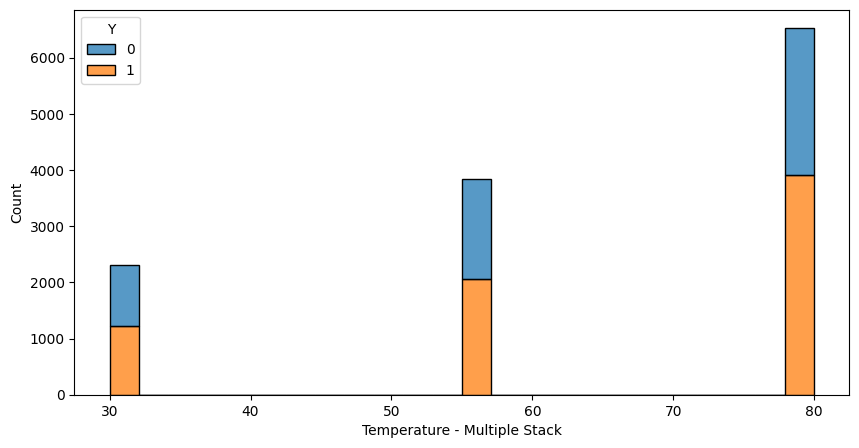

In [29]:
sns.histplot(data = data, x="temperature", hue="Y", multiple="stack")
plt.xlabel("Temperature - Multiple Stack")
plt.ylabel("Count")
plt.gcf().set_size_inches(10, 5)
plt.show()

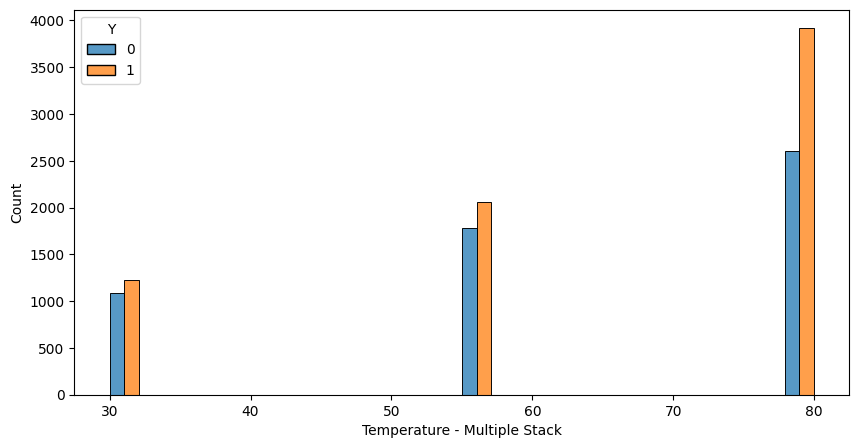

In [30]:
sns.histplot(data = data, x="temperature", hue="Y", multiple="dodge")
plt.xlabel("Temperature - Multiple Stack")
plt.ylabel("Count")
plt.gcf().set_size_inches(10, 5)
plt.show()

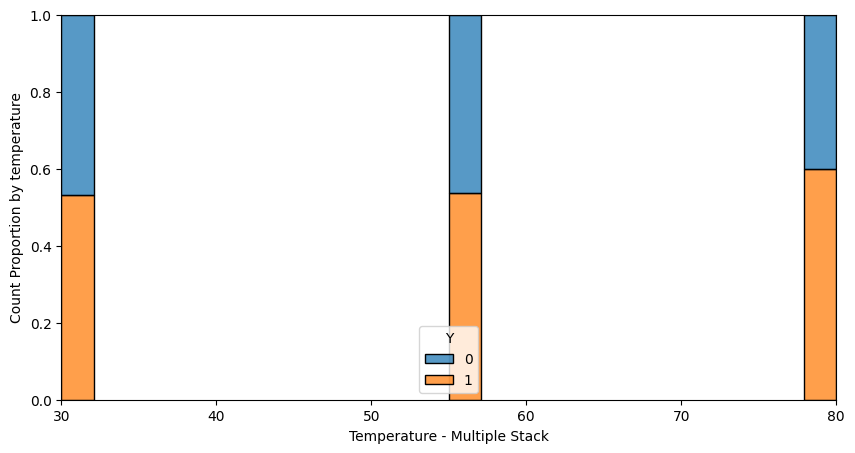

In [31]:
sns.histplot(data = data, x="temperature", hue="Y", multiple="fill")
plt.xlabel("Temperature - Multiple Stack")
plt.ylabel("Count Proportion by temperature")
plt.gcf().set_size_inches(10, 5)
plt.show()

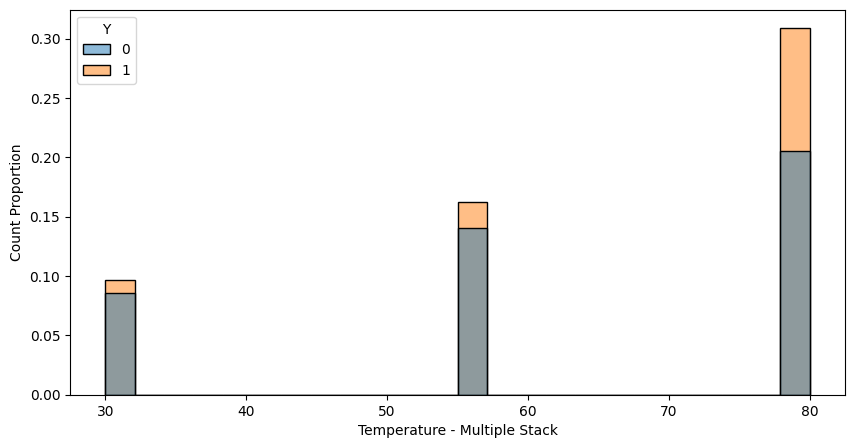

In [32]:
sns.histplot(data = data, x="temperature", hue="Y", stat="proportion")
plt.xlabel("Temperature - Multiple Stack")
plt.ylabel("Count Proportion")
plt.gcf().set_size_inches(10, 5)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [33]:
bar_coupons = data.query("coupon == 'Bar'")
bar_coupons.head()
bar_coupons.shape


(2017, 25)

2. What proportion of bar coupons were accepted?


In [34]:
bar_coupons_accepted = bar_coupons.query("Y==1")
print("Number of accepted bar coupons are ", bar_coupons_accepted.shape[0])
accepted_proportion_bar = bar_coupons_accepted.shape[0]/bar_coupons.shape[0]
print("Proprtion of accepted Bar coupons is " , round(accepted_proportion_bar*100, 2), "%")

Number of accepted bar coupons are  827
Proprtion of accepted Bar coupons is  41.0 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
bar_coupons_accepted_3_or_less = bar_coupons.query("(Y == 1) and ((Bar == '1~3') or (Bar == 'less1') or (Bar == 'never'))")
print("People who went to bar 3 or fewer times a month accepted ", bar_coupons_accepted_3_or_less.shape[0], " coupons")
print("People who went to bar more than 3 times a month accepted ", (bar_coupons_accepted.shape[0] - bar_coupons_accepted_3_or_less.shape[0]), " coupons")
acceptance_rate_3_or_less = bar_coupons_accepted_3_or_less.shape[0]/bar_coupons.shape[0]
acceptance_rate_more = (bar_coupons_accepted.shape[0] - bar_coupons_accepted_3_or_less.shape[0])/bar_coupons.shape[0]
print("Acceptance rate for people who went to bar 3 or fewer times a month is ", round(acceptance_rate_3_or_less*100, 2), "%")
print("Acceptance rate for people who went to bar more than 3 times a month is ", round(acceptance_rate_more*100, 2), "%")



People who went to bar 3 or fewer times a month accepted  674  coupons
People who went to bar more than 3 times a month accepted  153  coupons
Acceptance rate for people who went to bar 3 or fewer times a month is  33.42 %
Acceptance rate for people who went to bar more than 3 times a month is  7.59 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [36]:
bar_coupons_acc_morethanone_over25 = bar_coupons.query("(Y == 1) and ((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8')) and not ((age == '21') or (age == 'below21'))")
print("drivers who go to a bar more than once a month and are over the age of 25 and accepted bar coupons are", bar_coupons_acc_morethanone_over25.shape[0])
print("Their acceptance rate is ", round(bar_coupons_acc_morethanone_over25.shape[0]/bar_coupons.shape[0]*100, 2), "%")
other_accepeted_rate = (bar_coupons_accepted.shape[0] - bar_coupons_acc_morethanone_over25.shape[0])/bar_coupons.shape[0]
print("Acceptance rate for other drivers is ", round(other_accepeted_rate*100, 2), "%")


drivers who go to a bar more than once a month and are over the age of 25 and accepted bar coupons are 292
Their acceptance rate is  14.48 %
Acceptance rate for other drivers is  26.52 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [37]:
driv_acc_more_1_month= bar_coupons.query("(Y == 1) and ((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8'))")
print("drivers who go to a bar more than once a month and accepted bar coupons are", driv_acc_more_1_month.shape[0])

pass_not_kid = driv_acc_more_1_month.query("passanger != 'Kid(s)'")
print("from above set - drivers with no kids as passengers are ", pass_not_kid.shape[0])

occ_not_farming_fishing_forest = pass_not_kid.query("occupation != 'Farming Fishing & Forestry'")
print("from above set - drivers with occupation other than  arming, fishing, or forestry", occ_not_farming_fishing_forest.shape[0])

print("Their acceptance rate is ", round(occ_not_farming_fishing_forest.shape[0]/bar_coupons.shape[0]*100, 2), "%")



drivers who go to a bar more than once a month and accepted bar coupons are 410
from above set - drivers with no kids as passengers are  393
from above set - drivers with occupation other than  arming, fishing, or forestry 393
Their acceptance rate is  19.48 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [38]:
driv_acc_more_1_month= bar_coupons.query("(Y == 1) and ((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8'))")
#print("drivers who go to a bar more than once a month and accepted bar coupons are", driv_acc_more_1_month.shape[0])

pass_not_kid = driv_acc_more_1_month.query("passanger != 'Kid(s)'")
#print("from above set - drivers with no kids as passengers are ", pass_not_kid.shape[0])

pass_not_kid_not_widowed = pass_not_kid.query("maritalStatus != 'Widowed'")

acc_pass_not_kid_not_widowed = pass_not_kid_not_widowed.shape[0]/bar_coupons.shape[0]
print("acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is ", round(acc_pass_not_kid_not_widowed*100, 2), "%")

under_30 = driv_acc_more_1_month.query("(age == 'below21') or (age == '21') or (age == '26')")
acc_under_30 = under_30.shape[0]/bar_coupons.shape[0]
print("acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is ", round(acc_under_30*100, 2), "%")

cheap_rest_4_tm = bar_coupons.query("(Y == 1) and ((RestaurantLessThan20 == '4~8') or (RestaurantLessThan20 == 'gt8'))")
cheap_rest_4_tm_income = cheap_rest_4_tm.query("income == '$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999' or income == 'Less than $12500'")
acc_cheap_rest_4_tm_income  = cheap_rest_4_tm_income.shape[0]/bar_coupons.shape[0]
print("acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is ", round(acc_cheap_rest_4_tm_income*100, 2), "%")

acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is  19.48 %
acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is  12.35 %
acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is  7.73 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [39]:
print ("Hypothesis - Approximately 50% of Bar coupons were used by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed")

Hypothesis - Approximately 50% of Bar coupons were used by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed


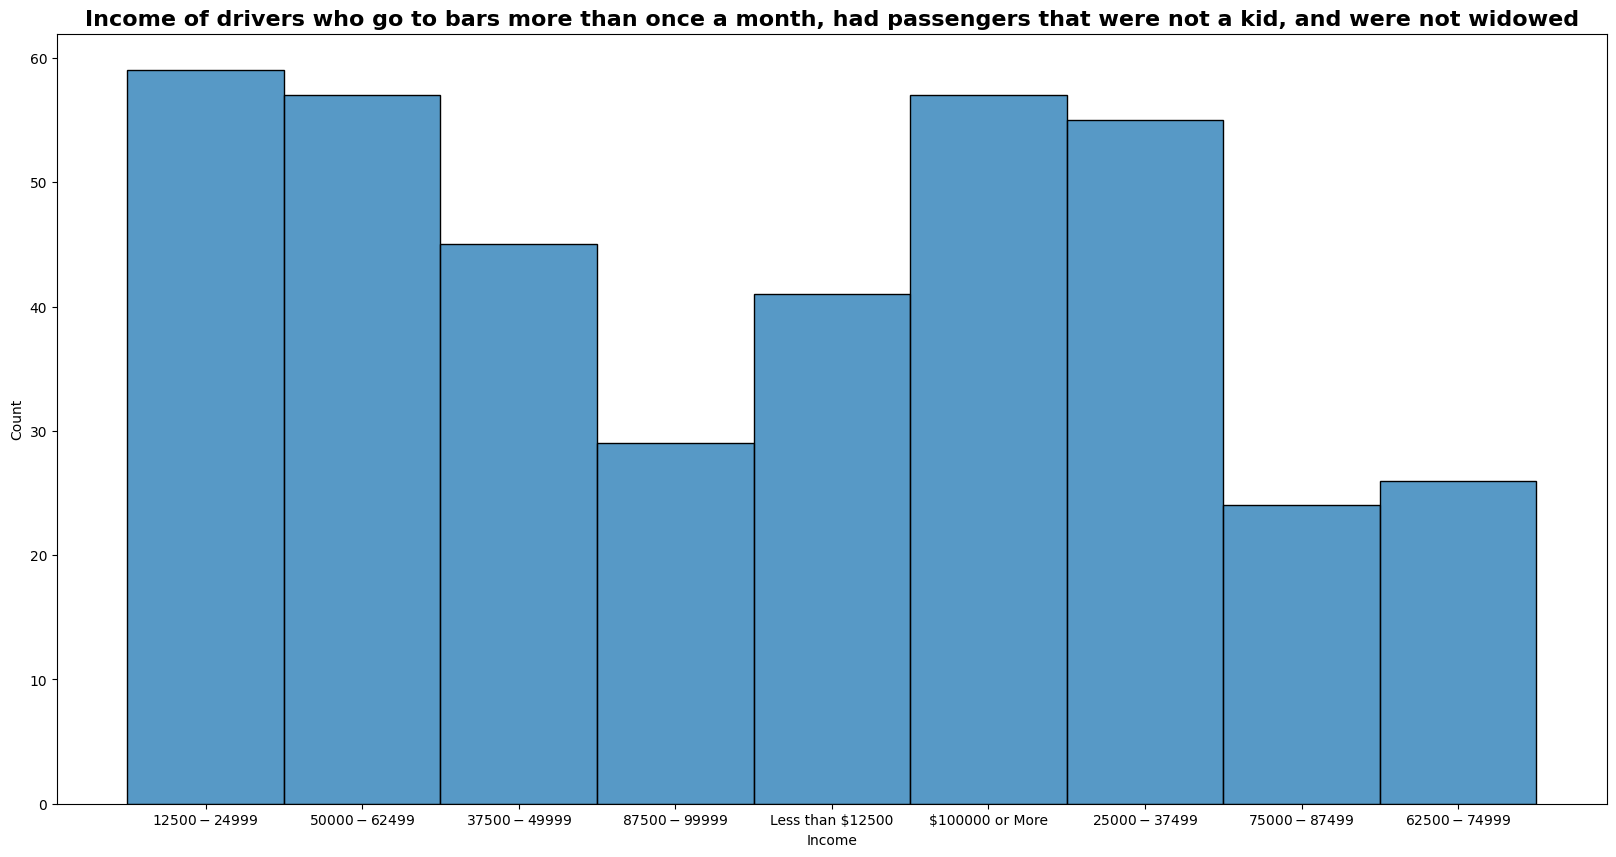

In [40]:
pass_not_kid_not_widowed.reset_index()
pass_not_kid_not_widowed.head()
sns.histplot(data = pass_not_kid_not_widowed, x = "income")
plt.title("Income of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed", fontsize=16, fontweight="bold")
plt.xlabel("Income")
plt.ylabel("Count")
plt.gcf().set_size_inches(20, 10)
plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

***ss - Exploring CoffeeHouse coupon***

In [49]:
coffee_house_coupon = data.query("coupon == 'Coffee House'")
coffee_house_coupon.shape
coffee_house_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [54]:
acc_coffee_house_coupon = coffee_house_coupon.query("Y == 1")
print("Number of coffee house coupons are ", coffee_house_coupon.shape[0])
print("Number of accepted coffee house coupons are ", acc_coffee_house_coupon.shape[0])
print("Proportion of accepted coffee house coupons is ", round(acc_coffee_house_coupon.shape[0]/coffee_house_coupon.shape[0]*100, 2), "%")

Number of coffee house coupons are  3996
Number of accepted coffee house coupons are  1995
Proportion of accepted coffee house coupons is  49.92 %


Finding out proportion of males and females who accepted coffee house coupons

In [64]:
male_acc_coffee_house = acc_coffee_house_coupon.query("gender == 'Male'")
print("Number of male accepted coffee house coupons are ", male_acc_coffee_house.shape[0])
print("Proportion of males who accepted coffee house coupon is ", round(male_acc_coffee_house.shape[0]/acc_coffee_house_coupon.shape[0]*100, 2), "%")

Number of male accepted coffee house coupons are  985
Proportion of males who accepted coffee house coupon is  49.37 %


***ss - checking number of times customers with coupons visit Coffee House***

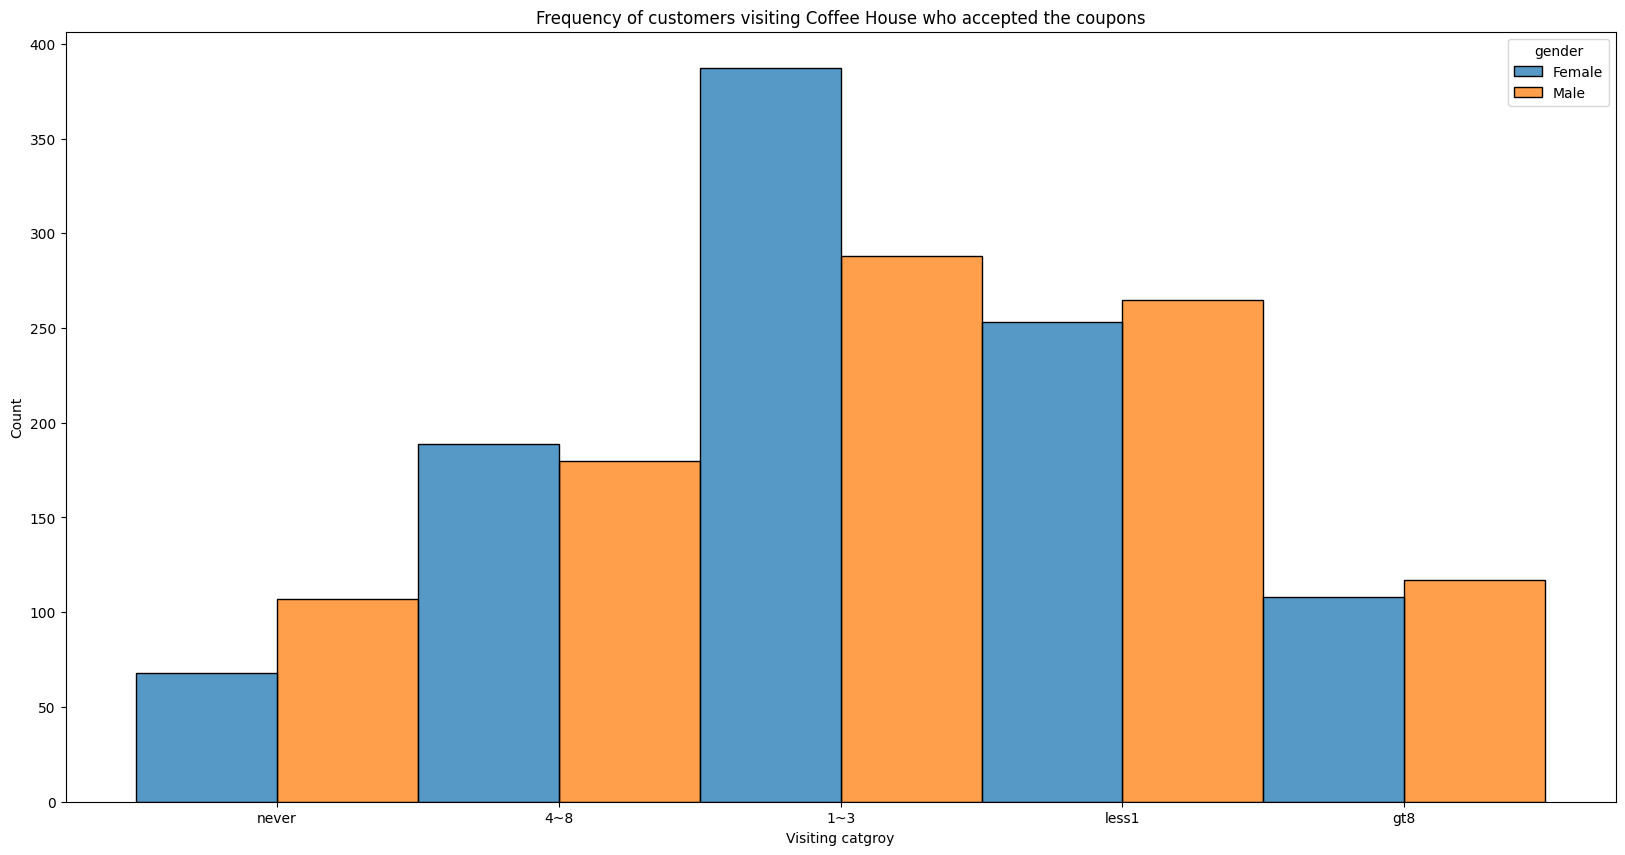

In [67]:
sns.histplot(data = acc_coffee_house_coupon, x= "CoffeeHouse", hue = "gender", multiple = "dodge" )
plt.title("Frequency of customers visiting Coffee House who accepted the coupons")
plt.xlabel("Visiting catgroy")
plt.ylabel("Count")
plt.gcf().set_size_inches(20, 10)
plt.show()

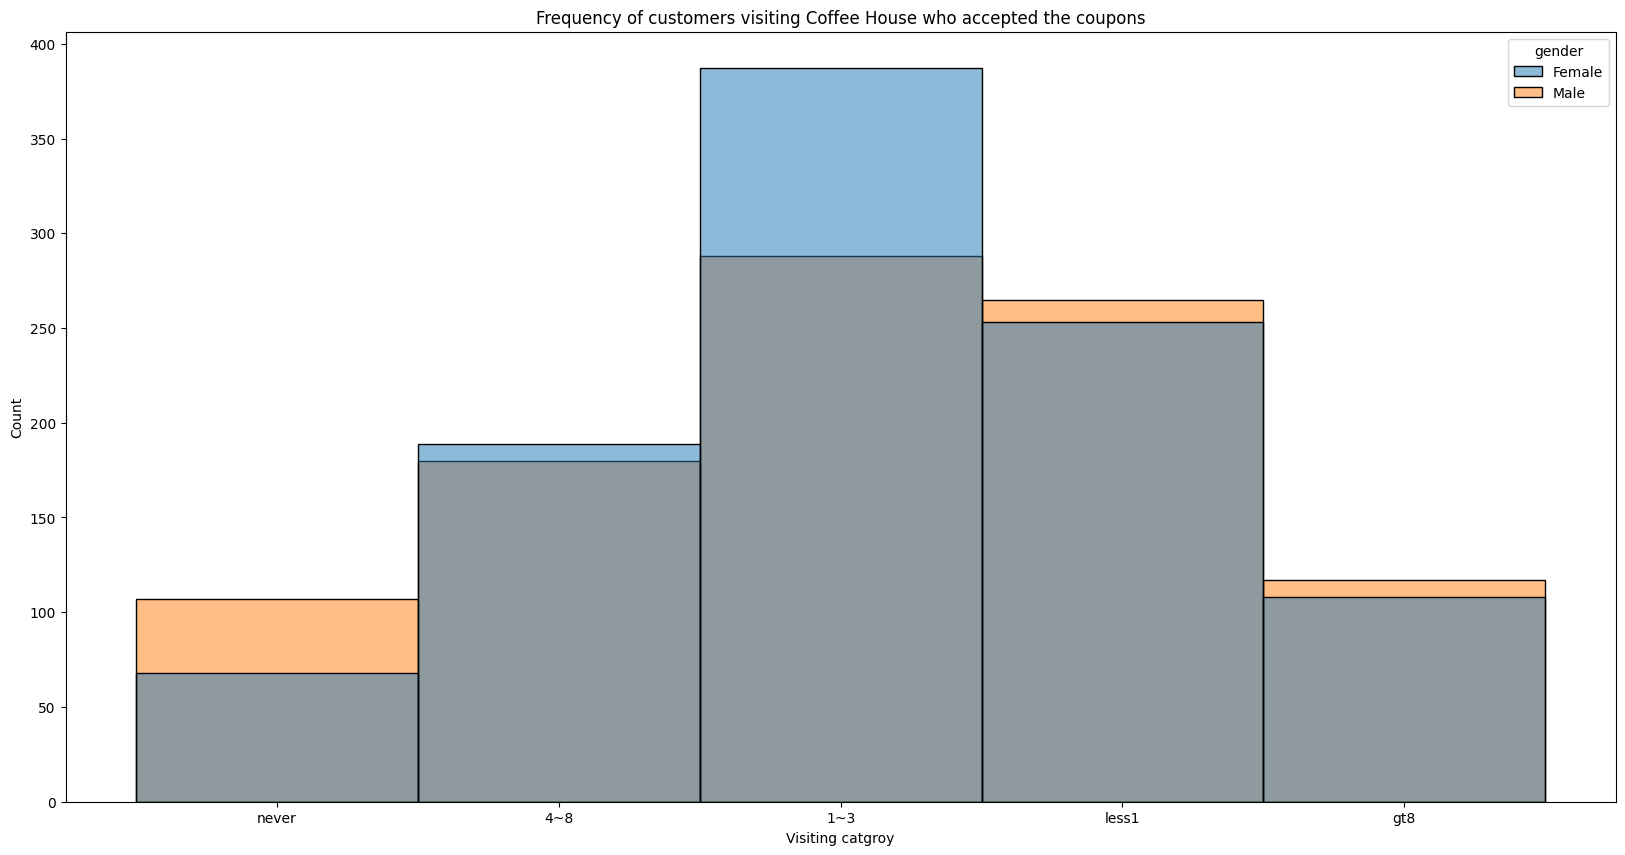

In [74]:
sns.histplot(data = acc_coffee_house_coupon, x= "CoffeeHouse", hue = "gender")
plt.title("Frequency of customers visiting Coffee House who accepted the coupons")
plt.xlabel("Visiting catgroy")
plt.ylabel("Count")
plt.gcf().set_size_inches(20, 10)
plt.show()

ss - Finding out proportion of female who accepted coupons and are visinig Coffee-House 1-3 times

In [77]:
fem_coffee_house_1_3 = acc_coffee_house_coupon.query("(gender == 'Female') and (CoffeeHouse == '1~3')")
print("Accepptance rate of females who visited coffee house 1 - 3 times is ", round(fem_coffee_house_1_3.shape[0]/coffee_house_coupon.shape[0]*100, 2), "%")


Accepptance rate of females who visited coffee house 1 - 3 times is  9.68 %


***ss - Finding out number of coffee coupons used by time.***

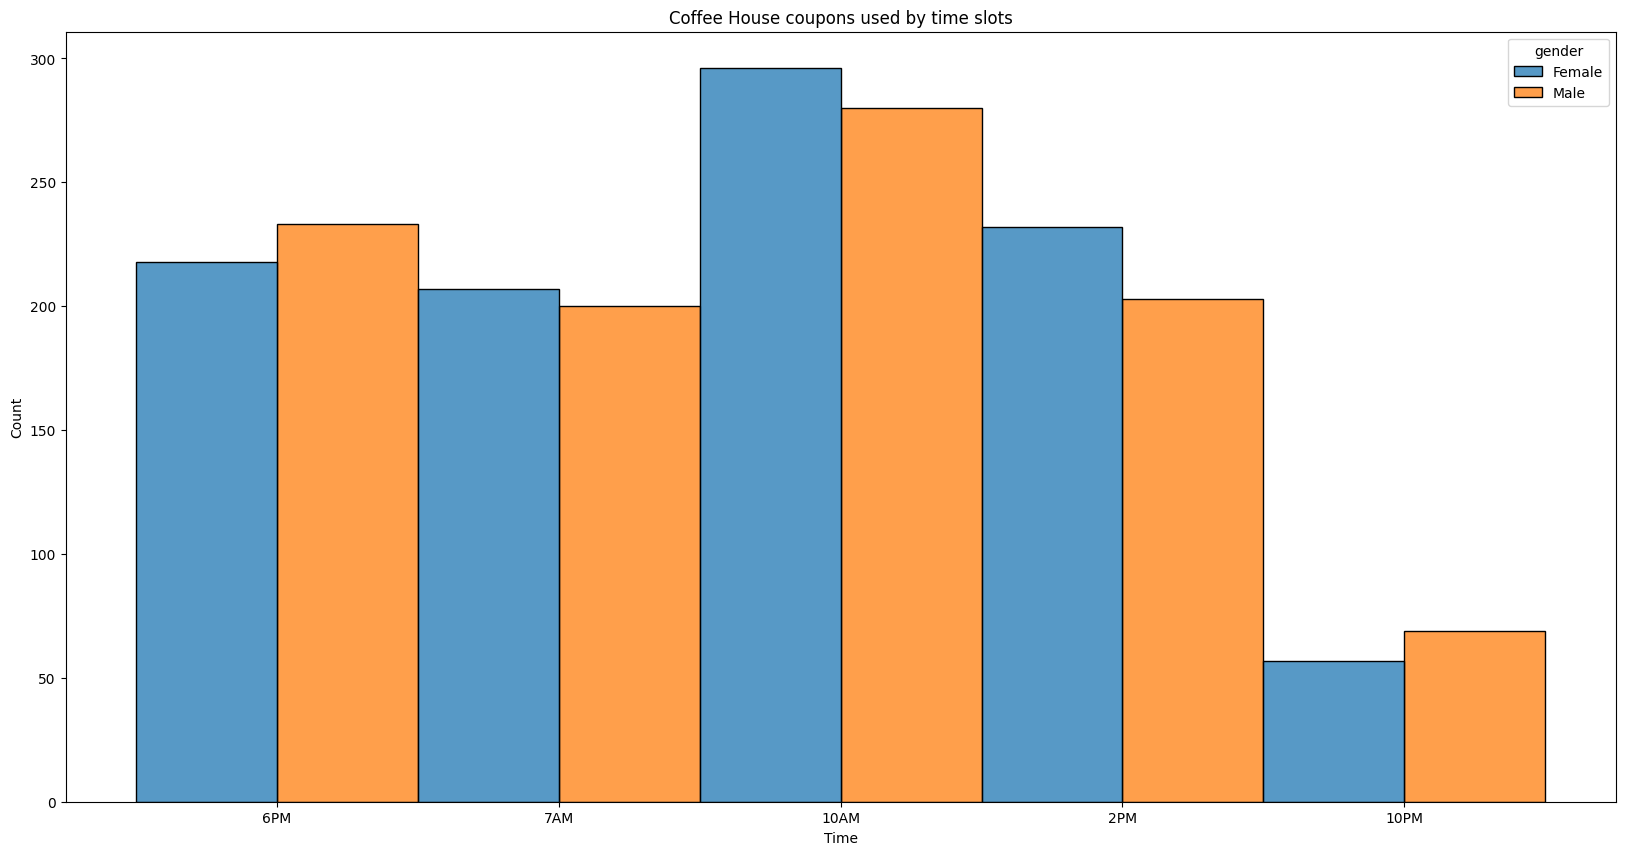

In [83]:
sns.histplot(data = acc_coffee_house_coupon, x= "time", hue = "gender", multiple = "dodge" )
plt.title("Coffee House coupons used by time slots")
plt.xlabel("Time")
plt.ylabel("Count")
plt.gcf().set_size_inches(20, 10)
plt.show()

***ss - Finding out number of coffee coupons used by destination.***

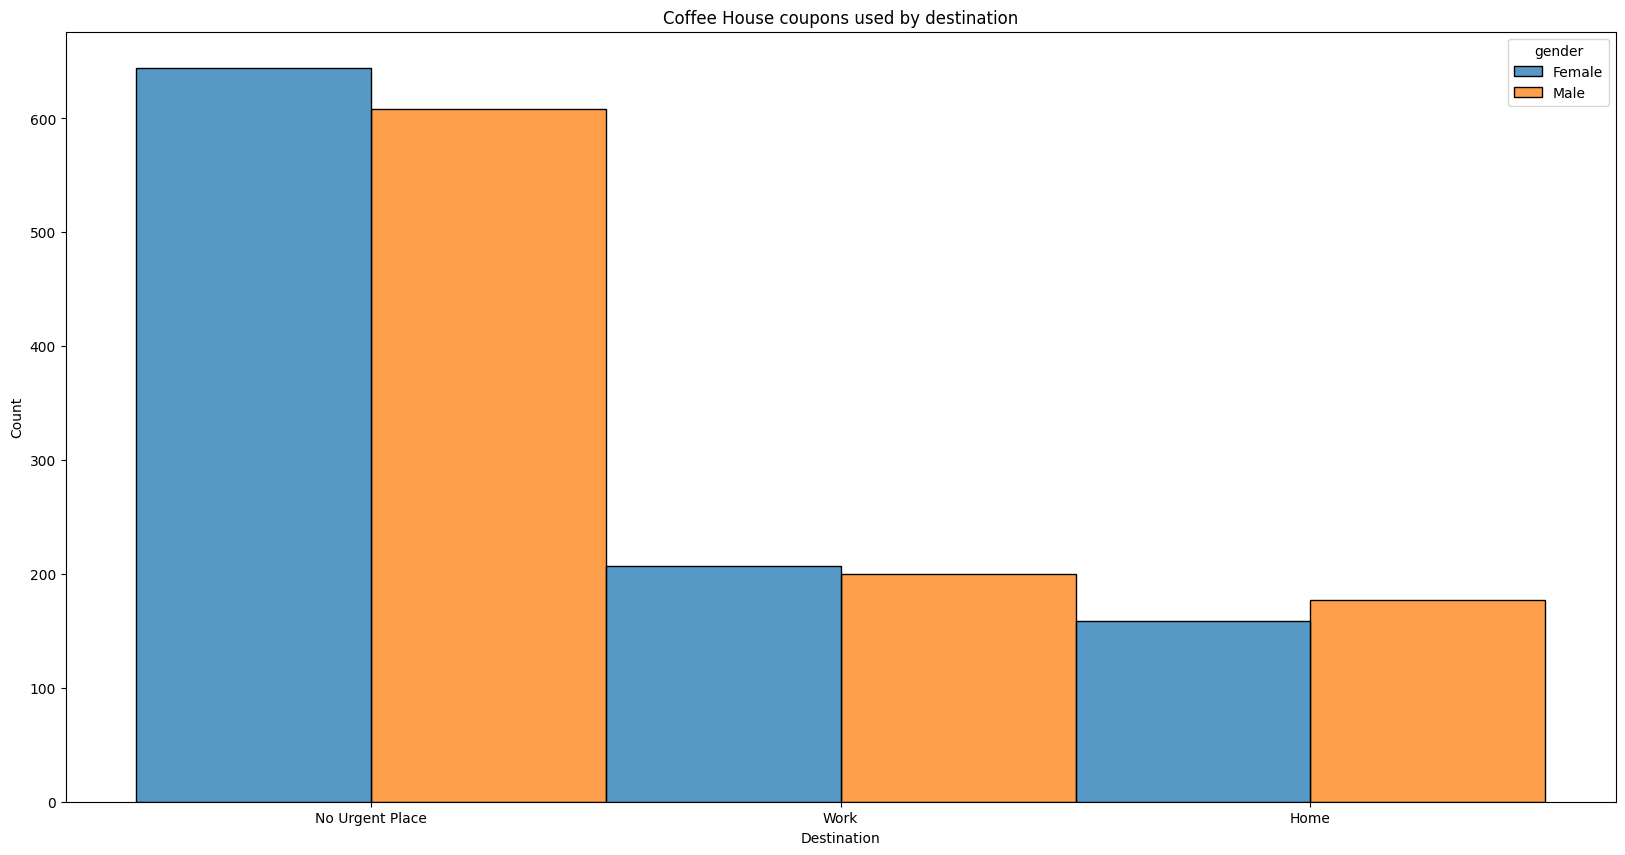

In [79]:
sns.histplot(data = acc_coffee_house_coupon, x= "destination", hue = "gender", multiple = "dodge" )
plt.title("Coffee House coupons used by destination")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.gcf().set_size_inches(20, 10)
plt.show()

***ss - Finding out number of coffee coupons used by females at 10:00 AM when they were not goint to any urgent place.***

In [84]:
fm_10_am_no_urgent = acc_coffee_house_coupon.query("(gender == 'Female') and (time == '10AM') and (destination == 'No Urgent Place')")
print("Coupons used by females at 10:00 AM when they were not goint to any urgent place are", fm_10_am_no_urgent.shape[0])
print("Accepptance rate of females who visited coffee house at 10:00 AM with no urgent place to go is ", round(fm_10_am_no_urgent.shape[0]/coffee_house_coupon.shape[0]*100, 2), "%")


Coupons used by females at 10:00 AM when they were not goint to any urgent place are 296
Accepptance rate of females who visited coffee house at 10:00 AM with no urgent place to go is  7.41 %


marital status of customers using coffee house coupons

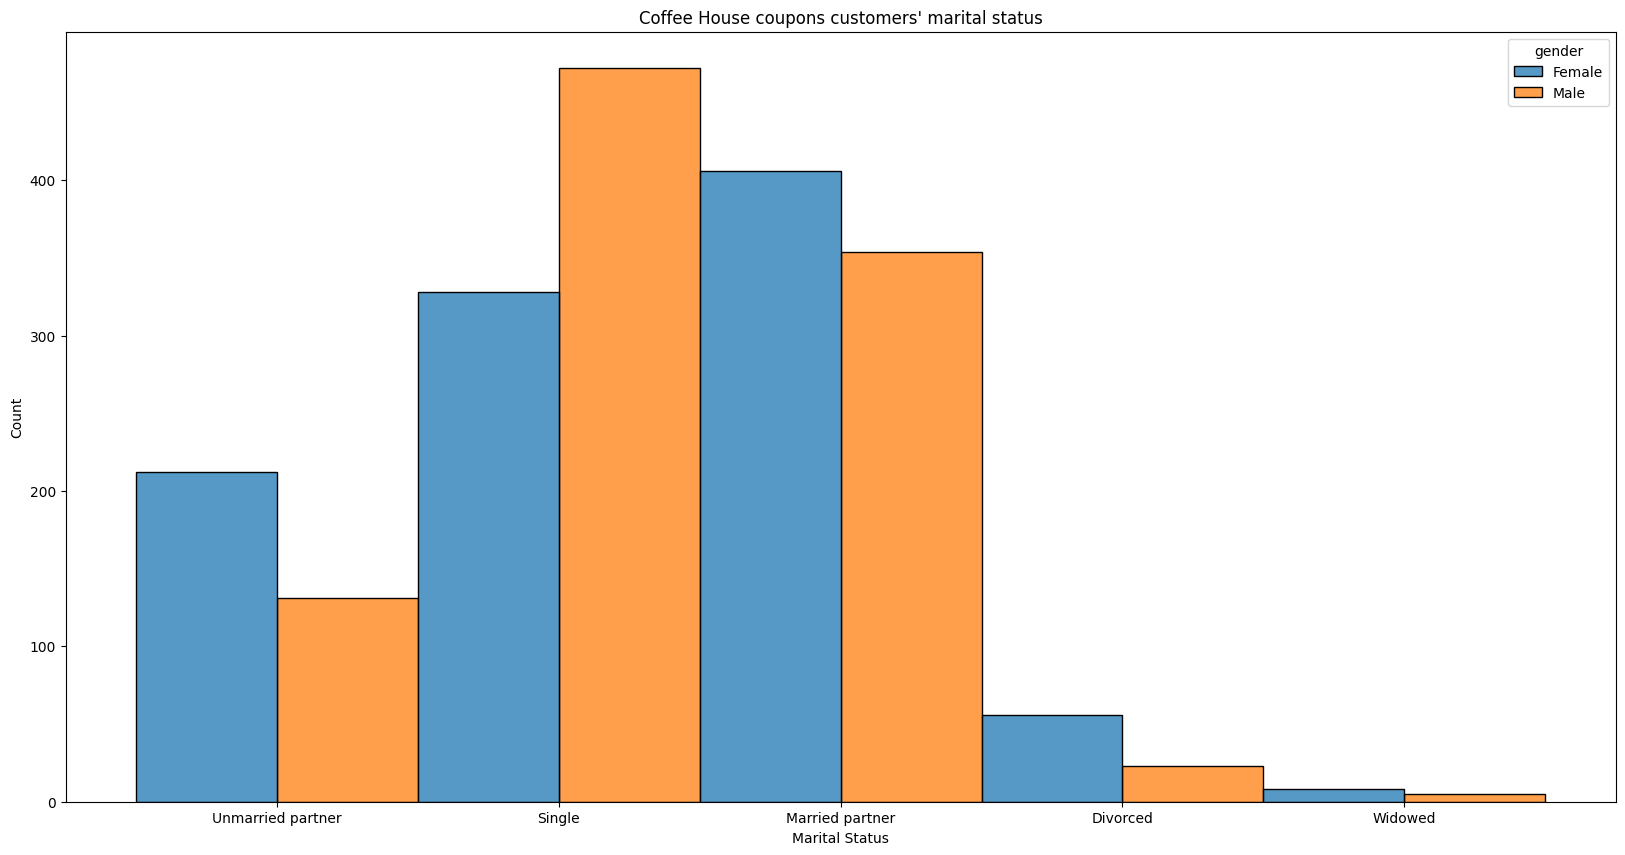

In [85]:
sns.histplot(data = acc_coffee_house_coupon, x= "maritalStatus", hue = "gender", multiple = "dodge" )
plt.title("Coffee House coupons customers' marital status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.gcf().set_size_inches(20, 10)
plt.show()
